In [1]:
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from tensorflow.keras.models import Sequential
import tensorflow.keras.utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras import regularizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten, Conv1D
from tensorflow.keras import backend as K

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from random import seed
from random import randint

import tensorflow as tf
import time as tm
import datetime
import os
from operator import itemgetter
from numpy import argmax

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Using InpactorDB with negative class (6M of sequences)

In [2]:
set_option("display.max_rows", 15)
pd.options.mode.chained_assignment = None

feature_vectors_all = np.load('/home/bioml/Projects/PhD/OE2/InpactorDB_non-redundant_final_format+neg_interleaved.fasta.filtered_shortest_kmers.npy')
label_vectors_all = np.load('/home/bioml/Projects/PhD/OE2/InpactorDB_non-redundant_final_format+neg_interleaved.fasta.filtered_shortest_labels.npy')

In [3]:
print(label_vectors_all.shape)
print(feature_vectors_all.shape)

Y_real = None#np.load('/home/bioml/Projects/PhD/OE2/position_detection/InpactorDB_non-redundant_final_format+neg_interleaved.fasta.filtered_shortest_labels.npy')


(5938386, 1)
(5938386, 5460)


In [4]:
# select randonly 2969193 registers
feature_vectors = np.zeros((2969193, feature_vectors_all.shape[1]), dtype=np.int16)
label_vectors = np.zeros((2969193, label_vectors_all.shape[1]), dtype=np.int16)
all_ready_in = []
length = feature_vectors_all.shape[0]
seed(1)
i = 0
while i < 2969193:
    value = randint(1, length-1)
    if value not in all_ready_in:
        feature_vectors[i, :] = feature_vectors_all[value, :]
        label_vectors[i] = label_vectors_all[value]
        all_ready_in.append(value)
        i += 1
        if i % 100000 == 0:
            print(str(i) + " of "+ str(2969193))
    

100000 of 2969193
200000 of 2969193
300000 of 2969193
400000 of 2969193
500000 of 2969193
600000 of 2969193
700000 of 2969193
800000 of 2969193
900000 of 2969193
1000000 of 2969193


KeyboardInterrupt: 

In [ ]:
Y_real = label_vectors
path_log_base = './logs'
# class dist|ribution
#print(training_data.groupby('Label').size())

label_vectors = np.where(label_vectors > 1, 1, label_vectors)

In [5]:
#training_data.loc[training_data['Label'] > 0, 'Label'] = 1
#print(training_data.groupby('Label').size())
#label_vectors = np.array(training_data['Label'].values, dtype=np.int8)
#feature_vectors = training_data
#training_data=None

print(label_vectors)
print(feature_vectors)
print(type(feature_vectors[0, 0]))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[[287 168 228 ...   0   0   0]
 [349 150 247 ...   0   0   0]
 [334 165 244 ...   1   1   0]
 ...
 [ 23  15  20 ...   0   0   0]
 [ 16  19  31 ...   0   0   0]
 [ 30  13  16 ...   0   0   0]]
<class 'numpy.int16'>


In [ ]:
# Scaling
scaler = preprocessing.StandardScaler()
step = 0
for i in range(0, feature_vectors.shape[0], 500000):
    print(step)
    batch = feature_vectors[i:i+500000, :]
    scaler.partial_fit(batch)
    step += 1

feature_vectors_scaler

In [6]:
# Scaling
scaler = preprocessing.StandardScaler()
step = 0
for i in range(0, feature_vectors.shape[0], 500000):
    print(step)
    scaler.partial_fit(feature_vectors[i:i+500000, :])
    step += 1


0
1
2
3
4
5
6
7
8
9
10
11


TypeError: Cannot interpret '5460' as a data type

In [7]:
feature_vectors_scaler = np.zeros((feature_vectors.shape[0], feature_vectors.shape[1]))
step = 0
for i in range(0, feature_vectors.shape[0], 500000):
    print(step)
    feature_vectors_scaler[i:i+500000, :] = scaler.transform(feature_vectors[i:i+500000, :])
    step += 1

batch = None
batch_transformed = None
feature_vectors = None

#data split: 80% train, 10% dev and 10% test
validation_size = 0.2
seed = 7
X_trainScaler, X_test_dev, Y_trainScaler, Y_test_dev = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)
label_vectors=None
feature_vectors_scaler = None
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=0.5, random_state=seed)


from joblib import dump, load
dump(scaler, 'std_scaler_508.bin', compress=True)

MemoryError: Unable to allocate 242. GiB for an array with shape (5938386, 5460) and data type float64

In [7]:
print(len(X_trainPCAScaler[0]))
print(X_trainPCAScaler.shape)

2714
(400000, 2714)


In [8]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [9]:
def metrics(Y_validation,predictions):
    classes = len(np.unique(Y_validation))
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(classes), range(classes))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()

In [10]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Test Accuracy {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Train Accuracy {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['val_f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Validation F1-Score {}, Época:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('F1-Score Vs Epoch')
        plt.ylabel('F1-Score')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.pdf', format='pdf')     
        #plt.show()
        
        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.pdf', format='pdf') 
        plt.show() 

In [11]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_testPCAScaler, one_hot_labels_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [12]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    
    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [13]:
def Nakano_Net():
    #tf.keras.backend.clear_session()X_testPCAScaler

    # FNN implemented by Nakano

    #Inputs
    inputs = keras.Input(shape=(X_trainPCAScaler.shape[1],), name="input_1")
    #layer 1
    layers = keras.layers.Dense(200,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(inputs)
    layers = keras.layers.Dropout(0.5)(layers)
    layers = keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True)(layers)
    #layer 2
    layers = keras.layers.Dense(200,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    layers = keras.layers.Dropout(0.5)(layers)
    layers = keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True)(layers)
    #layer 3
    layers = keras.layers.Dense(200,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    layers = keras.layers.Dropout(0.5)(layers)
    layers = keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True)(layers)
    # layer 4
    predictions = keras.layers.Dense(21, activation="softmax", name="output_1")(layers)
    # model generation
    model = keras.Model(inputs = inputs, outputs=predictions)
    # optimizer
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,)
    # loss function
    loss_fn = keras.losses.CategoricalCrossentropy()
    # Compile model
    #model.compile(loss=loss_fn, optimizer=opt, metrics=['acc', 'AUC', 'mse','mae','mape'])
    model.compile(loss=loss_fn, optimizer=opt, metrics=[f1_m])
    return model

In [14]:
def InpactorFNN_Net():
    # best result: 92 in training 91 en dev
    tf.keras.backend.clear_session()

    # FNN implemented by Nakano

    #Inputs
    inputs = tf.keras.Input(shape=(X_trainPCAScaler.shape[1],), name="input_1")
    #layer 1
    layers = tf.keras.layers.Dense(2200,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(inputs)
    #layer 2
    layers = tf.keras.layers.Dense(2000,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 2
    layers = tf.keras.layers.Dense(1800,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 3
    layers = tf.keras.layers.Dense(1600,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 4
    layers = tf.keras.layers.Dense(1400,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 5
    layers = tf.keras.layers.Dense(1200,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 6
    layers = tf.keras.layers.Dense(1000,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 7
    layers = tf.keras.layers.Dense(800,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 8
    layers = tf.keras.layers.Dense(600,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 9
    layers = tf.keras.layers.Dense(400,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 10
    layers = tf.keras.layers.Dense(200,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 11
    layers = tf.keras.layers.Dense(100,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 12
    layers = tf.keras.layers.Dense(50,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layer 13
    layers = tf.keras.layers.Dense(25,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)  
    #layer 14
    layers = tf.keras.layers.Dense(10,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)  
    #layer 15
    layers = tf.keras.layers.Dense(5,activation="relu",kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    # layer 16
    predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="output_1")(layers)
    # model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    # optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,)
    # loss function
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    # Compile model
    #model.compile(loss=loss_fn, optimizer=opt, metrics=['acc', 'AUC', 'mse','mae','mape'])
    model.compile(loss=loss_fn, optimizer=opt, metrics=[f1_m])
    return model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2714)]            0         
_________________________________________________________________
dense (Dense)                (None, 2200)              5973000   
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              4402000   
_________________________________________________________________
dense_2 (Dense)              (None, 1800)              3601800   
_________________________________________________________________
dense_3 (Dense)              (None, 1600)              2881600   
_________________________________________________________________
dense_4 (Dense)              (None, 1400)              2241400   
_________________________________________________________________
dense_5 (Dense)              (None, 1200)              168120

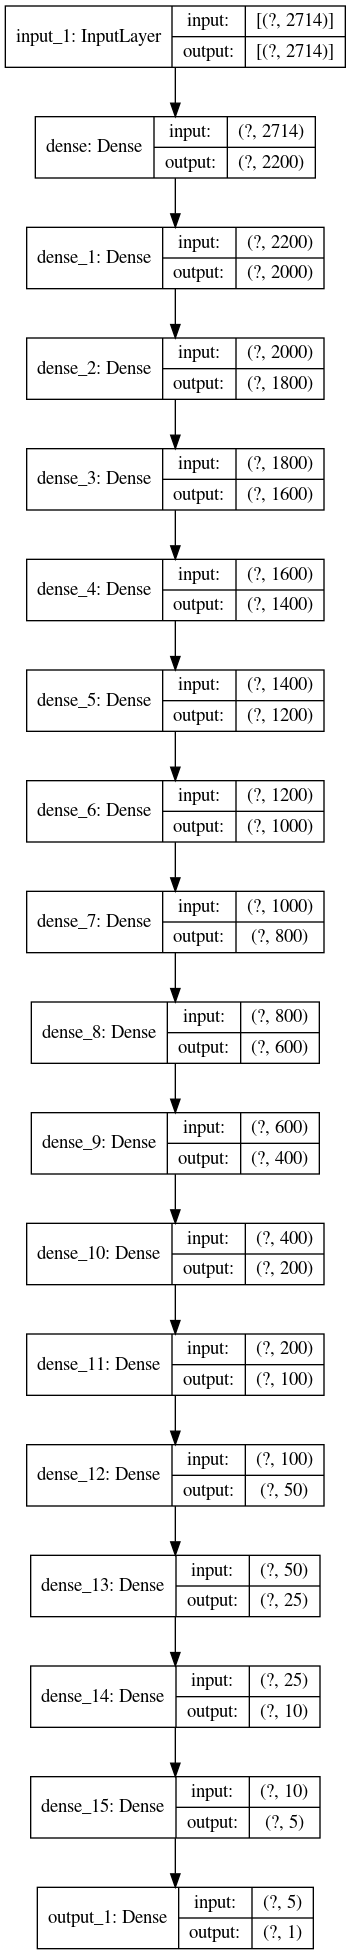

In [15]:
# linea base, arquitectura de Nakano
# model = InpactorFNN_Net()

# arquitectura a afinar
model = InpactorFNN_Net()
# summarize layers
print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
one_hot_labels_train = Y_trainScaler#tf.keras.utils.to_categorical(Y_trainScaler, num_classes=2)
one_hot_labels_validation = Y_dev#tf.keras.utils.to_categorical(Y_dev, num_classes=2)
one_hot_labels_test = Y_test#tf.keras.utils.to_categorical(Y_test, num_classes=2)

# Fit the model

train(model, X_trainPCAScaler, one_hot_labels_train, X_validationPCAScaler, one_hot_labels_validation, X_testPCAScaler, one_hot_labels_test, 256, 200, "InpactorFNN")
Final_Results_Test(log_Dir)

Epoch 1/200
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5847 - f1_m: 0.6928 - val_loss: 0.9787 - val_f1_m: 0.7047
Epoch 2/200
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9794 - f1_m: 0.7025 - val_loss: 0.9785 - val_f1_m: 0.7047
Epoch 3/200
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9790 - f1_m: 0.7025 - val_loss: 0.9762 - val_f1_m: 0.7047
Epoch 4/200
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9789 - f1_m: 0.7025 - val_loss: 0.9795 - val_f1_m: 0.7047
Epoch 5/200
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9789 - f1_m: 0.7026 - val_loss: 0.9802 - val_f1_m: 0.7047
Epoch 6/200
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9789 - f1_m: 0.7025 - val_loss: 0.9798 - val_f1_m: 0.7047
Epoch 7/200
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9789 - f1_m: 0.7025 - val_loss: 0.9778 - val_f1_m: 0.7047
Epoch 8/200
1563/1563 [====

KeyboardInterrupt: 

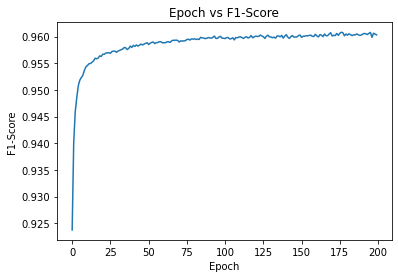

Test Accuracy 0.948689877986908, Época:40

Test Accuracy 0.9484043121337891, Época:25


Train Accuracy 0.96082603931427, Época:177

Train Accuracy 0.9607923626899719, Época:196

Train Accuracy 0.960740864276886, Época:170

Train Accuracy 0.9607378244400024, Época:178

Train Accuracy 0.9606382250785828, Época:198

Train Accuracy 0.9606370329856873, Época:176

Train Accuracy 0.9606155157089233, Época:195

Train Accuracy 0.9606015086174011, Época:192

Train Accuracy 0.9606004357337952, Época:174

Train Accuracy 0.9605256915092468, Época:182


Validation F1-Score 0.9522863030433655, Época:189

Validation F1-Score 0.9522334337234497, Época:157

Validation F1-Score 0.9521265029907227, Época:181

Validation F1-Score 0.9521033763885498, Época:197

Validation F1-Score 0.9517476558685303, Época:196

Validation F1-Score 0.9517188668251038, Época:148

Validation F1-Score 0.9516239166259766, Época:111

Validation F1-Score 0.9516133069992065, Época:200

Validation F1-Score 0.9515525102615356, Época:

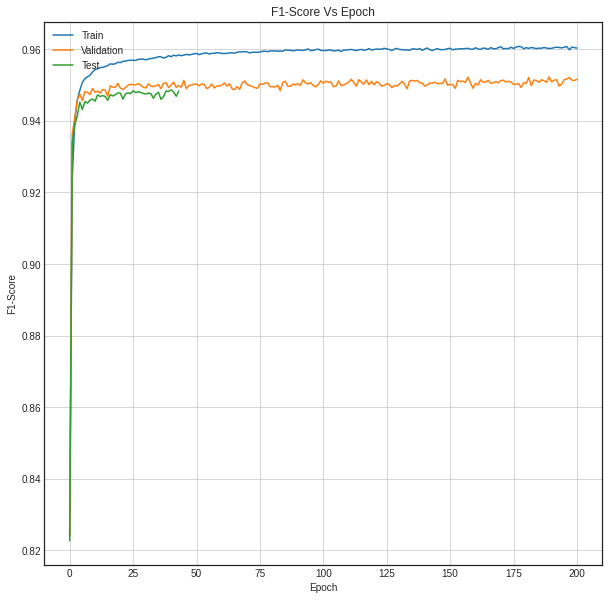

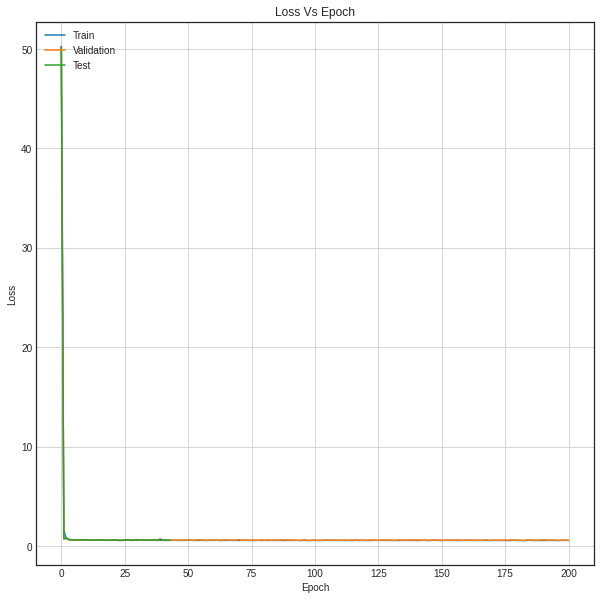

In [18]:
# plot metrics
plt.plot(history.history['f1_m'])
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Epoch vs F1-Score')
plt.show()

#GRÁFICOS DE LAS TRES CURVAS TRAIN TEST Y VALIDACIÓN
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)

In [31]:
#model = tf.keras.models.load_model(log_Dir+'/saved-model-179-0.9110.hdf5', custom_objects={'f1_m':f1_m})

scores = model.evaluate(X_trainPCAScaler, one_hot_labels_train, verbose=0)
print("Baseline Error train: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_validationPCAScaler, one_hot_labels_validation, verbose=0)
print("Baseline Error dev: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_testPCAScaler, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))

predictions = model.predict(X_trainPCAScaler)

metrics(Y_trainScaler, [argmax(x) for x in predictions])

predictions = model.predict(X_validationPCAScaler)

metrics(Y_dev, [argmax(x) for x in predictions])

predictions = model.predict(X_testPCAScaler)

metrics(Y_test, [argmax(x) for x in predictions])

ResourceExhaustedError:  OOM when allocating tensor with shape[1000,800] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node dense_7/kernel/Regularizer/Abs (defined at <ipython-input-12-cc5b1df7d9f0>:16) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_test_function_2806014]

Function call stack:
test_function


# Tuning the architecture

In [ ]:
# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=InpactorFNN_Net, verbose=1)
# define the grid search parameters
batch_size = [8, 16, 32, 64, 128, 256]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_trainPCAScaler, one_hot_labels_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.9321 - f1_m: 0.8159
Epoch 2/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8941 - f1_m: 0.8157
Epoch 3/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8938 - f1_m: 0.8158
Epoch 4/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8937 - f1_m: 0.8158
Epoch 5/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8936 - f1_m: 0.8159
Epoch 6/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8935 - f1_m: 0.8160
Epoch 7/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8934 - f1_m: 0.8159
Epoch 8/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8932 - f1_m: 0.8159
Epoch 9/10
29784/29784 [==============================] - 234s 8ms/step - loss: 0.8931 - f1_m: 0.8159
Epoch 10/10
7446/7446 [==============================] - 17s 2ms/step - loss: 0.89

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.9345 - f1_m: 0.8160
Epoch 2/10
29784/29784 [==============================] - 227s 8ms/step - loss: 0.8947 - f1_m: 0.8160
Epoch 3/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8943 - f1_m: 0.8159
Epoch 4/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8941 - f1_m: 0.8161
Epoch 5/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8940 - f1_m: 0.8162
Epoch 6/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8939 - f1_m: 0.8160
Epoch 7/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8938 - f1_m: 0.8162
Epoch 8/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8936 - f1_m: 0.8160
Epoch 9/10
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8935 - f1_m: 0.8159
Epoch 10/10
7446/7446 [==============================] - 19s 3ms/step - loss: 0.89

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/10
29784/29784 [==============================] - 232s 8ms/step - loss: 1.1942 - f1_m: 0.9126
Epoch 2/10
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8953 - f1_m: 0.9273
Epoch 3/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8381 - f1_m: 0.9303
Epoch 4/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.7815 - f1_m: 0.9317
Epoch 5/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.7932 - f1_m: 0.9319
Epoch 6/10
29784/29784 [==============================] - 230s 8ms/step - loss: 0.7809 - f1_m: 0.9326
Epoch 7/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.7775 - f1_m: 0.9327
Epoch 8/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8021 - f1_m: 0.9332
Epoch 9/10
29784/29784 [==============================] - 230s 8ms/step - loss: 0.7951 - f1_m: 0.9338
Epoch 10/10
7446/7446 [==============================] - 19s 3ms/step - loss: 0.75

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.9352 - f1_m: 0.8155
Epoch 2/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8961 - f1_m: 0.8152
Epoch 3/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8958 - f1_m: 0.8154
Epoch 4/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8957 - f1_m: 0.8153
Epoch 5/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8956 - f1_m: 0.8154
Epoch 6/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8955 - f1_m: 0.8156
Epoch 7/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8954 - f1_m: 0.8155
Epoch 8/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8953 - f1_m: 0.8152
Epoch 9/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8952 - f1_m: 0.8152
Epoch 10/10
7446/7446 [==============================] - 18s 2ms/step - loss: 0.89

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.9654 - f1_m: 0.8158
Epoch 2/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8873 - f1_m: 0.8157
Epoch 3/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8871 - f1_m: 0.8158
Epoch 4/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8871 - f1_m: 0.8157
Epoch 5/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8870 - f1_m: 0.8159
Epoch 6/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8870 - f1_m: 0.8158
Epoch 7/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8870 - f1_m: 0.8158
Epoch 8/10
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8869 - f1_m: 0.8159
Epoch 9/10
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8869 - f1_m: 0.8159
Epoch 10/10
7446/7446 [==============================] - 19s 3ms/step - loss: 0.88

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.9301 - f1_m: 0.8158
Epoch 2/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8979 - f1_m: 0.8159
Epoch 3/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8976 - f1_m: 0.8161
Epoch 4/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8974 - f1_m: 0.8159
Epoch 5/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8972 - f1_m: 0.8158
Epoch 6/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8970 - f1_m: 0.8157
Epoch 7/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8968 - f1_m: 0.8161
Epoch 8/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8966 - f1_m: 0.8159
Epoch 9/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8964 - f1_m: 0.8159
Epoch 10/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.9334 - f1_m: 0.8158
Epoch 2/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8942 - f1_m: 0.8159
Epoch 3/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8940 - f1_m: 0.8160
Epoch 4/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8939 - f1_m: 0.8160
Epoch 5/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8938 - f1_m: 0.8161
Epoch 6/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8936 - f1_m: 0.8161
Epoch 7/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8935 - f1_m: 0.8160
Epoch 8/50
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8934 - f1_m: 0.8160
Epoch 9/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8932 - f1_m: 0.8160
Epoch 10/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/50
29784/29784 [==============================] - 233s 8ms/step - loss: 0.9379 - f1_m: 0.8159
Epoch 2/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8936 - f1_m: 0.8158
Epoch 3/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8933 - f1_m: 0.8159
Epoch 4/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8933 - f1_m: 0.8159
Epoch 5/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8932 - f1_m: 0.8159
Epoch 6/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8932 - f1_m: 0.8158
Epoch 7/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8931 - f1_m: 0.8158
Epoch 8/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8931 - f1_m: 0.8159
Epoch 9/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8930 - f1_m: 0.8160
Epoch 10/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.9293 - f1_m: 0.8151
Epoch 2/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8984 - f1_m: 0.8154
Epoch 3/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8982 - f1_m: 0.8155
Epoch 4/50
29784/29784 [==============================] - 231s 8ms/step - loss: 0.8979 - f1_m: 0.8153
Epoch 5/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0.8977 - f1_m: 0.8153
Epoch 6/50
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8975 - f1_m: 0.8154
Epoch 7/50
29784/29784 [==============================] - 234s 8ms/step - loss: 0.8973 - f1_m: 0.8154
Epoch 8/50
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8971 - f1_m: 0.8152
Epoch 9/50
29784/29784 [==============================] - 233s 8ms/step - loss: 0.8969 - f1_m: 0.8155
Epoch 10/50
29784/29784 [==============================] - 232s 8ms/step - loss: 0

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/50
29784/29784 [==============================] - 229s 8ms/step - loss: 0.9303 - f1_m: 0.8158
Epoch 2/50
29784/29784 [==============================] - 227s 8ms/step - loss: 0.8964 - f1_m: 0.8161
Epoch 3/50
29784/29784 [==============================] - 229s 8ms/step - loss: 0.8960 - f1_m: 0.8159
Epoch 4/50
29784/29784 [==============================] - 228s 8ms/step - loss: 0.8958 - f1_m: 0.8156
Epoch 5/50
29784/29784 [==============================] - 226s 8ms/step - loss: 0.8957 - f1_m: 0.8157
Epoch 6/50
29784/29784 [==============================] - 226s 8ms/step - loss: 0.8955 - f1_m: 0.8158
Epoch 7/50
29784/29784 [==============================] - 226s 8ms/step - loss: 0.8953 - f1_m: 0.8158
Epoch 8/50
29784/29784 [==============================] - 225s 8ms/step - loss: 0.8952 - f1_m: 0.8158
Epoch 9/50
29784/29784 [==============================] - 225s 8ms/step - loss: 0.8950 - f1_m: 0.8158
Epoch 10/50
29784/29784 [==============================] - 225s 8ms/step - loss: 0

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 308, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


Epoch 1/100
29784/29784 [==============================] - 230s 8ms/step - loss: 1.1372 - f1_m: 0.9128
Epoch 2/100
29784/29784 [==============================] - 230s 8ms/step - loss: 0.8536 - f1_m: 0.9274
Epoch 3/100
29784/29784 [==============================] - 230s 8ms/step - loss: 0.7909 - f1_m: 0.9301
Epoch 4/100
29784/29784 [==============================] - 230s 8ms/step - loss: 0.7968 - f1_m: 0.9305
Epoch 5/100
29784/29784 [==============================] - 231s 8ms/step - loss: 0.7913 - f1_m: 0.9316
Epoch 6/100
29784/29784 [==============================] - 229s 8ms/step - loss: 0.8038 - f1_m: 0.9317
Epoch 7/100
29784/29784 [==============================] - 227s 8ms/step - loss: 0.7905 - f1_m: 0.9321
Epoch 8/100
29784/29784 [==============================] - 227s 8ms/step - loss: 0.7739 - f1_m: 0.9320
Epoch 9/100
29784/29784 [==============================] - 227s 8ms/step - loss: 0.7924 - f1_m: 0.9322
Epoch 10/100
29784/29784 [==============================] - 226s 8ms/step

In [ ]:
def InpactorFNN_Net(optimizer='adam', loss='binary_crossentropy', activation='relu', l1=0.0001, l2=0.01):
    # best result: 92 in training 91 en dev
    tf.keras.backend.clear_session()

    # FNN implemented by Nakano

    #Inputs
    inputs = tf.keras.Input(shape=(X_trainPCAScaler.shape[1],), name="input_1")
    #layer 1
    layers = tf.keras.layers.Dense(2200,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(inputs)
    #layer 2
    layers = tf.keras.layers.Dense(2000,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 2
    layers = tf.keras.layers.Dense(1800,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 3
    layers = tf.keras.layers.Dense(1600,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 4
    layers = tf.keras.layers.Dense(1400,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 5
    layers = tf.keras.layers.Dense(1200,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 6
    layers = tf.keras.layers.Dense(1000,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 7
    layers = tf.keras.layers.Dense(800,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 8
    layers = tf.keras.layers.Dense(600,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 9
    layers = tf.keras.layers.Dense(400,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 10
    layers = tf.keras.layers.Dense(200,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 11
    layers = tf.keras.layers.Dense(100,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 12
    layers = tf.keras.layers.Dense(50,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    #layer 13
    layers = tf.keras.layers.Dense(25,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)  
    #layer 14
    layers = tf.keras.layers.Dense(10,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)  
    #layer 15
    layers = tf.keras.layers.Dense(5,activation=activation,kernel_regularizer=regularizers.l1(l1),bias_regularizer=regularizers.l2(l2))(layers)
    # layer 16
    predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="output_1")(layers)
    # model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    # Compile mode
    model.compile(loss=loss, optimizer=optimizer, metrics=[f1_m])
    return model